<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_09/blob/Modifications-to-Q1/Coursework_question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

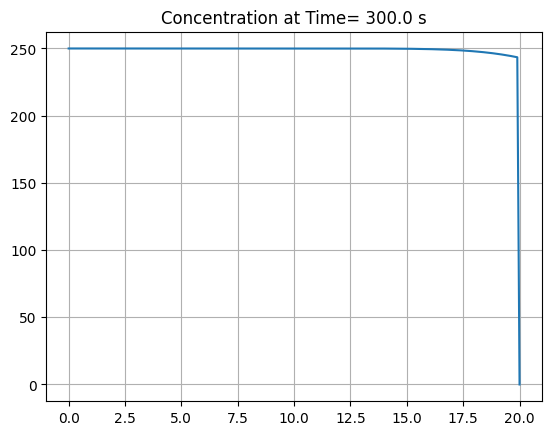

In [3]:
import numpy as np
import matplotlib.pyplot as plt #mathplot is used to make an 'figure' where the ax graph can be mapped onto
from IPython.display import display, clear_output #This is required because colab will print multiple graphs if looped

#These are the inputs that act as parameters that allows the user to specify model domain, resolution and boundary conditions at the edge of the domain
end_time = float(input("How long should the model last for, in seconds  "))
time_interval = float(input("The time interval, in seconds   "))
length = float(input("Length of model, in metres   "))
length_interval = float(input("The length interval, in metres   "))
speed = float(input("Speed of river flow, in m/s   "))
concentration_at_x0_past = float(input("initial_concentration_at_x0, in μg/m^3   "))

#We create a function that utilises the previous inputs and calculates and graphs the concentration of pollutant against distance downstream for each time interval
def concentration_with_initial_concentration_at_only_x0(end_time,time_interval,length,length_interval,concentration_at_x0_past,speed):

  distance = np.array([]) #Creates an empty array to hold 'distance' values
  for i in range(int(length / length_interval+1)): #This calculates how many steps in distance that can fit within the interval and loops that many times
    distance = np.append(distance , length_interval * i ) #Adds the calculated values for distance step into the 'distance' array

  initial_conditions = np.zeros(int(length / length_interval+1)) #Creates an empty array the size of number of steps in distance
  initial_conditions[0] = concentration_at_x0_past #Sets the first value in the 'initial_conditions' array to inputted initial pollution level

  #fig creates a blank picture frame which draws on the co-ordinate system 'ax' so colab doesn't get confused which graph to output
  fig, ax = plt.subplots()

  #These set parameters for the axis from 0 to the largest value of distance down the river and concentration of pollutants
  ax.set_xlim(0 , length)
  ax.set_ylim(0 , concentration_at_x0_past)

  #These label the axis of the graph
  ax.set_xlabel("Distance (m)")
  ax.set_ylabel("Concentration (μg/m^3)")

  #The A and B values are calculated here, to simplify the calculation to find the new level of pollution using a rearrangement of the advection equation
  A_value = 1/time_interval + speed / length_interval
  B_value = speed / length_interval

  #These create empty arrays for A and B
  A_array = np.array([])
  B_array = np.array([])

  #This adds the 'A-values' to the 'A_array' and the 'B-values' to the 'B_array' multiple times (the number of steps there are in the distance)
  for i in range(int(length / length_interval +1)):
    A_array = np.append(A_array, A_value)
    B_array = np.append(B_array, B_value)

  #This calculates and loops by the number of steps in time and sets the first value of concentration array as the previously inputted value
  for k in range(int(end_time / time_interval)+1):
    concentration_present = np.zeros(int(length / length_interval+1))
    concentration_present[0] = concentration_at_x0_past

    #Calculating the concentration
    for i in range(1,int(length / length_interval)):
      concentration_present[i]=(initial_conditions[i] / time_interval + B_array[i]*concentration_present[i-1]) / A_array[i]

    #These prepare the graph by first clearing the last output, plotting the graph to ax and setting up a title and grid
    ax.clear() #Clears the previous lines to provide an animation effect
    ax.plot(distance, initial_conditions)
    ax.set_title(f"Concentration at Time= {k * time_interval} s")
    ax.grid(True)

    clear_output(wait=True) #Deletes everything in the output cell so that the graphs do not stack on eachother, Wait=True means that the previous output is cleared once the new output is ready
    display(fig) #Displays the graph

    #This is the pause between each update to the graph
    plt.pause(0.1)

    #The initial condtitions are now the end results of the previous iteration
    initial_conditions = np.copy(concentration_present)

  #Closes the figure once the loop has ended
  plt.close()

#The function is then run to produce an output
concentration_with_initial_concentration_at_only_x0(end_time,time_interval,length,length_interval,concentration_at_x0_past,speed)

In [ ]:
import numpy as np
import pandas as pd
A_value = 3
B_value = 5
A_array = np.array([])
B_array = np.array([])
for i in range(7 +1):
  A_array = np.append(A_array, A_value)
  B_array = np.append(B_array, B_value)
print(A_array)
print(B_array)


import matplotlib.pyplot as plt
from IPython.display import display, clear_output
#fig creates a blank picture frame which draws on the co-ordinate system 'ax'
fig, ax = plt.subplots()

#PUT THESE BEFORE THE LOOP
#These set parameters for the axis from 0 to the largest value of distance down the river and concentration of pollutants
ax.set_xlim(0 , length)
ax.set_ylim(0 , concentration_at_x0_past)

#These label the axis of the graph
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Concentration (μg/m^3)")



#THESE GO WITHIN THE LOOP FOR THE NUMBER OF INTERVAL FOR THE X AXIS
ax.clear() #Clears the previous lines to provide an animation effect
ax.plot(distance, initial_conditions)
ax.set_title(f"Concentration at Time {k * time_interval} s")
ax.grid(True)

clear_output(wait=True) #deletes everything in the output cell so that the graphs do not stack on eachother
display(fig) #displays the graph

plt.pause(0.05) #This is the pause between each update to the graph


#PUT THIS OUTSIDE THE LOOP
plt.close() #Closes the figure once the loop has ended


[3. 3. 3. 3. 3. 3. 3. 3.]
[5. 5. 5. 5. 5. 5. 5. 5.]
